<a href="https://colab.research.google.com/github/Maksimka9/clustering-diploma-/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задачи:

1. Пороговое значение - больше половины
2. Разметить все кластеры, взяв за начальные значения первый семестр
3. Применить модель прогнозирования кол-ва студентов
---
Алгоритм:

-Взять первый семестр за изначальные значения

-Для каждого кластера найти такой, в который он перешел больше чем на половину

-Остальным дать новые номера


Проблема: Кластер получен из двух больших частей других кластеров.

Решение: Отметить тем номером, элементов которого больше

In [80]:
# Подключение модулей (библиотек)

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster
from sklearn import datasets

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Загрузка данных по семестрам

sem_1_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_1.csv?raw=true"
sem_2_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_2.csv?raw=true"
sem_3_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_3.csv?raw=true"
sem_4_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_4.csv?raw=true"
sem_5_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_5.csv?raw=true"
sem_6_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_6.csv?raw=true"
sem_7_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_7.csv?raw=true"
sem_8_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_8.csv?raw=true"

df_sem_1 = pd.read_csv(sem_1_data, index_col=False)
df_sem_2 = pd.read_csv(sem_2_data, index_col=False)
df_sem_3 = pd.read_csv(sem_3_data, index_col=False)
df_sem_4 = pd.read_csv(sem_4_data, index_col=False)
df_sem_5 = pd.read_csv(sem_5_data, index_col=False)
df_sem_6 = pd.read_csv(sem_6_data, index_col=False)
df_sem_7 = pd.read_csv(sem_7_data, index_col=False)
df_sem_8 = pd.read_csv(sem_8_data, index_col=False)

In [3]:
# Вспомогательная таблица для сопоставления меток класса с хэш-номером студентов

hash_df_1 = df_sem_1[['hash']]
hash_df_2 = df_sem_2[['hash']]
hash_df_3 = df_sem_3[['hash']]
hash_df_4 = df_sem_4[['hash']]
hash_df_5 = df_sem_5[['hash']]
hash_df_6 = df_sem_6[['hash']]
hash_df_7 = df_sem_7[['hash']]
hash_df_8 = df_sem_8[['hash']]

In [4]:
# Нормализуем данные (среднее значение=0, дисперсия=1)

from sklearn.preprocessing import StandardScaler

standart_data_1 = StandardScaler().fit_transform(df_sem_1.iloc[:,1:])
standart_data_2 = StandardScaler().fit_transform(df_sem_2.iloc[:,1:])
standart_data_3 = StandardScaler().fit_transform(df_sem_3.iloc[:,1:])
standart_data_4 = StandardScaler().fit_transform(df_sem_4.iloc[:,1:])
standart_data_5 = StandardScaler().fit_transform(df_sem_5.iloc[:,1:])
standart_data_6 = StandardScaler().fit_transform(df_sem_6.iloc[:,1:])
standart_data_7 = StandardScaler().fit_transform(df_sem_7.iloc[:,1:])
standart_data_8 = StandardScaler().fit_transform(df_sem_8.iloc[:,1:])

standart_data_list = [standart_data_1, standart_data_2, standart_data_3, standart_data_4, 
                    standart_data_5, standart_data_6, standart_data_7, standart_data_8]


In [5]:
# Применяем PCA к кластеризованным данным

# Выбираем кол-во компонент, которые нужно оставить, и сами данные
reduced_df_1 = PCA(n_components=2).fit_transform(standart_data_1)
reduced_df_2 = PCA(n_components=2).fit_transform(standart_data_2)
reduced_df_3 = PCA(n_components=2).fit_transform(standart_data_3)
reduced_df_4 = PCA(n_components=2).fit_transform(standart_data_4)
reduced_df_5 = PCA(n_components=2).fit_transform(standart_data_5)
reduced_df_6 = PCA(n_components=2).fit_transform(standart_data_6)
reduced_df_7 = PCA(n_components=2).fit_transform(standart_data_7)
reduced_df_8 = PCA(n_components=2).fit_transform(standart_data_8)

# Превращаем результаты обратно в удобный вид
reduced_df_1 = pd.DataFrame(reduced_df_1) 
reduced_df_2 = pd.DataFrame(reduced_df_2)
reduced_df_3 = pd.DataFrame(reduced_df_3)
reduced_df_4 = pd.DataFrame(reduced_df_4)
reduced_df_5 = pd.DataFrame(reduced_df_5)
reduced_df_6 = pd.DataFrame(reduced_df_6)
reduced_df_7 = pd.DataFrame(reduced_df_7)
reduced_df_8 = pd.DataFrame(reduced_df_8)

reduced_df_list = [reduced_df_1, reduced_df_2, reduced_df_3, reduced_df_4,
                   reduced_df_5, reduced_df_6, reduced_df_7, reduced_df_8]


In [ ]:
# Подсчёт метрик качества кластеризации, чтобы понять насколько хорошо была проведена кластеризация.


# Создание словаря для значений метрик по каждому кластеру
silhouette_dict = {}
calinski_score_dict = {}
davies_score_dict = {}


n = 1 # Значение нужно для вывода графиков

for table in standart_data_list:
  for k in range(2, 35):
    agglom_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=k) # Создаём экземпляр класса, где указываем кол-во кластеров
    clusters = agglom_clustering.fit_predict(table) # Вычисляем к какому элементу отнести каждый кластер

    # Запись данных во вспомогательный словарь
    transfer_list_silhouette = {k: sklearn.metrics.silhouette_score(table, clusters)}
    transfer_list_calinski = {k: sklearn.metrics.calinski_harabasz_score(table, clusters)}
    transfer_list_davies = {k: sklearn.metrics.davies_bouldin_score(table, clusters)}
    # Перенос данных в главные словари
    silhouette_dict.update(transfer_list_silhouette)
    calinski_score_dict.update(transfer_list_calinski)
    davies_score_dict.update(transfer_list_davies)
    # Удаление вспомогательных словарей
    del(transfer_list_silhouette)
    del(transfer_list_calinski)
    del(transfer_list_davies)
  

  # Создание pandas dataframe из словарей
  silhouette_df = pd.DataFrame.from_dict(silhouette_dict, orient='index') 
  calinski_df = pd.DataFrame.from_dict(calinski_score_dict, orient='index')
  davies_df = pd.DataFrame.from_dict(davies_score_dict, orient='index')


  plt.figure(figsize=(18, 23))

  # Вывод графиков метрик по всем семестрам
  plt.subplot(8, 3, n)
  plt.plot(silhouette_df.index, silhouette_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Коэффициент силуэта')
  plt.subplot(8, 3, n+1)
  plt.plot(calinski_df.index, calinski_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Метрика Калински-Харабаза')
  plt.subplot(8, 3, n+2)
  plt.plot(davies_df.index, davies_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Метрика Дэвиса-Боулдина')
  n += 3


In [6]:
# Проведение финальной кластеризации дл фиксированного кол-ва кластеров по каждому семестру

processed_df_list = []
processed_df_dict = {'processed_df_1':15, 'processed_df_2':8, 'processed_df_3':10, 'processed_df_4':5,
                     'processed_df_5':12, 'processed_df_6':18, 'processed_df_7':17, 'processed_df_8':8}


# Вычисление кластера для каждого элемента

for key in processed_df_dict.keys():
  agglom_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters = processed_df_dict[key])
  processed_df = agglom_clustering.fit_predict(standart_data_list[int(key[-1])-1]) 
  processed_df_list.append(processed_df)

# Превращение NumPy array (в данном случае вектор) в pandas DataFrame
labels_df_1 = pd.DataFrame(processed_df_list[0], columns = ['labels'])
labels_df_2 = pd.DataFrame(processed_df_list[1], columns = ['labels'])
labels_df_3 = pd.DataFrame(processed_df_list[2], columns = ['labels'])
labels_df_4 = pd.DataFrame(processed_df_list[3], columns = ['labels']) 
labels_df_5 = pd.DataFrame(processed_df_list[4], columns = ['labels'])
labels_df_6 = pd.DataFrame(processed_df_list[5], columns = ['labels'])
labels_df_7 = pd.DataFrame(processed_df_list[6], columns = ['labels'])
labels_df_8 = pd.DataFrame(processed_df_list[7], columns = ['labels'])


In [ ]:
# Отображение набора данных, используя разные цвета для разных кластеров

n = 1

for number in range(0, len(processed_df_list)):
  plt.figure(figsize=(21, 28))
  graph = plt.subplot(4, 2, 1)
  graph.scatter(reduced_df_list[number][0], reduced_df_list[number][1], c = processed_df_list[number], s=10) # с - используемые цвета
  plt.xlabel('1-ая компонента')
  plt.ylabel('2-ая компонента')
  graph.set_title('семестр №'+str(n))
  n+=1
  plt.show()

In [ ]:
# Соединение меток кластера и хеш-кодов

hash_df_1['labels']  = labels_df_1.loc[:, 'labels']
hash_df_2['labels']  = labels_df_2.loc[:, 'labels']
hash_df_3['labels']  = labels_df_3.loc[:, 'labels']
hash_df_4['labels']  = labels_df_4.loc[:, 'labels']
hash_df_5['labels']  = labels_df_5.loc[:, 'labels']
hash_df_6['labels']  = labels_df_6.loc[:, 'labels']
hash_df_7['labels']  = labels_df_7.loc[:, 'labels'] 
hash_df_8['labels']  = labels_df_8.loc[:, 'labels'] 

hash_df_list = [hash_df_1, hash_df_2, hash_df_3, hash_df_4,
                hash_df_5, hash_df_6, hash_df_7, hash_df_8]


In [ ]:
hash_df_list[7].groupby(['labels']).count()

,hash
labels,
0,4437
1,45
2,24
3,63
4,95
5,88
6,25
7,13


In [8]:
compare_list = []

for i in range(0, len(hash_df_list)-1):
  compare_labels_df = hash_df_list[i].merge(hash_df_list[i+1], on = 'hash', how = 'inner')
  compare_labels_df = compare_labels_df.rename(columns={'labels_x':'labels_sem_'+str(i+1),'labels_y':'labels_sem_'+str(i+2)})
  compare_list.append(compare_labels_df)



In [20]:
compare_list[1]

,hash,labels_sem_2,labels_sem_3
0,0x000DE9673F941872AFFC6EF39B3B0EEAC868BA3B,0,0
1,0x00153956450F17DDD7C0610CF52E1476DE4E65E8,4,0
2,0x0019D4D822B0D9A3DD3336438904749E38147903,4,0
3,0x0026AD5250A4C255F6687FBE6292D8EBE10915E7,4,0
4,0x003E178322849C3A0C8CED05322BA8F0509FEFC9,0,0
...,...,...,...
9055,0xFFE57CD000A9958C3DB006F2EC9264E6874616AB,0,0
9056,0xFFEE3249B0511C419EF4CA031FA2F2A19C26B2F6,0,0
9057,0xFFEFB385175A8D99A1FCBBE7805433B9BBF68D28,2,4
9058,0xFFF3F87B5BE639E7AA3FB301DA2FD48D2074D648,0,0


In [9]:
# Создание двух списков содержащих таблицы кластеров по смежным семестрам

count_table_list = []
group_df_list = []

for i in range(0, len(compare_list)):
  count_table = compare_list[i].groupby([compare_list[i].iloc[:,1], compare_list[i].iloc[:,2]]).count()
  count_table.reset_index(drop=True, inplace=True)
  count_table_list.append(count_table)

  group_df = pd.DataFrame(compare_list[i].groupby([compare_list[i].iloc[:,1], compare_list[i].iloc[:,2]]))
  group_df_list.append(group_df)


In [ ]:
count_table_list[0]

In [10]:
# Создание словаря для таблиц смежных семестров

cluster_match_list = []

for i in range(0, len(compare_list)):

  cluster_match_df = pd.DataFrame(columns=[compare_list[i].columns[1], compare_list[i].columns[2], compare_list[i].columns[0]])

  for index in count_table_list[i].index:
    string = pd.DataFrame({compare_list[i].columns[1] : [group_df_list[i][0][index][0]],
                           compare_list[i].columns[2] : [group_df_list[i][0][index][1]],
                           compare_list[i].columns[0] : [count_table_list[i]['hash'][index]]})
    cluster_match_df = pd.concat([cluster_match_df, string])
  
  df_name = str(i+1)+'-'+str(i+2)+' sem'
  cluster_match_list.append(cluster_match_df)


In [11]:
for df in cluster_match_list:
  df.reset_index(drop=True, inplace=True)

In [19]:
cluster_match_list[0]

,labels_sem_1,labels_sem_2,hash
0,0,0,5643
1,0,1,52
2,0,2,10
3,0,4,1197
4,0,5,2
5,1,0,9
6,1,2,121
7,2,2,56
8,3,0,8
9,3,5,68


In [12]:
df_1 = cluster_match_list[0].copy(deep=True)
df_2 = cluster_match_list[1].copy(deep=True)
df_3 = cluster_match_list[2].copy(deep=True)
df_4 = cluster_match_list[3].copy(deep=True)
df_5 = cluster_match_list[4].copy(deep=True)
df_6 = cluster_match_list[5].copy(deep=True)
df_7 = cluster_match_list[6].copy(deep=True)

label_change_dict_1 = {0:0, 2:1, 4:5, 5:3, 7:13, 1:18, 3:19, 6:20}
label_change_dict_2 = {0:0, 1:21, 2:22, 3:23, 4:24, 5:25, 6:26, 7:27, 8: 28, 9:29}
label_change_dict_3 = {0:0, 1:27, 2:26, 3:30, 4:31}
label_change_dict_4 = {0:0, 1:32, 2:33, 3:34, 4:35, 5:36, 6:37, 7:31, 8:38, 9:39, 10:40, 11:41}
label_change_dict_5 = {0:0, 1:40, 2:42, 3:34, 4:35, 5:33, 6:43, 8:44, 9:32, 10:36, 11:45, 12:46, 14:47, 15:48, 16:38, 17:49}
label_change_dict_6 = {0:0, 1:34, 2:44, 3:50, 4:33, 5:46, 7:36, 8:51, 9:42, 10:52, 11:53, 12:54, 13:35, 14:45, 15:47, 16:55}
label_change_dict_7 = {0:0, 1:34, 2:52, 3:42, 4:56, 5:57, 6:58, 7:45}



In [13]:
for index, value in enumerate(df_1.iloc[:, 1]):
  df_1.iloc[index, 1] = label_change_dict_1[value]

for index, value in enumerate(df_2.iloc[:, 1]):
  df_2.iloc[index, 1] = label_change_dict_2[value]

for index, value in enumerate(df_3.iloc[:, 1]):
  df_3.iloc[index, 1] = label_change_dict_3[value]

for index, value in enumerate(df_4.iloc[:, 1]):
  df_4.iloc[index, 1] = label_change_dict_4[value]

for index, value in enumerate(df_5.iloc[:, 1]):
  df_5.iloc[index, 1] = label_change_dict_5[value]

for index, value in enumerate(df_6.iloc[:, 1]):
  df_6.iloc[index, 1] = label_change_dict_6[value]

for index, value in enumerate(df_7.iloc[:, 1]):
  df_7.iloc[index, 1] = label_change_dict_7[value]

final_df_list = [df_1, df_2, df_3, df_4, df_5, df_6, df_7]

In [ ]:
all_unique_clusters = set(df_1.iloc[:,1])
for df in final_df_list:
  all_unique_clusters.update(df.iloc[:,1])

all_unique_clusters = list(all_unique_clusters)
all_unique_clusters

In [15]:
same_clusters_counting_1 = {}
same_clusters_counting_2 = {}
same_clusters_counting_3 = {}
same_clusters_counting_4 = {}
same_clusters_counting_5 = {}
same_clusters_counting_6 = {}
same_clusters_counting_7 = {}
same_clusters_counting_8 = {}

for i in all_unique_clusters:
  counter = 0
  for index in df_1.index:
    if df_1.iloc[index, 0] == i: 
      counter += df_1.iloc[index, 2]
  same_clusters_counting_1.update({i:counter})

for i in all_unique_clusters:
  counter = 0
  for index in df_1.index:
    if df_1.iloc[index, 1] == i: 
      counter += df_1.iloc[index, 2]
  same_clusters_counting_2.update({i:counter})

for i in all_unique_clusters:
  counter = 0
  for index in df_2.index:
    if df_2.iloc[index, 1] == i: 
      counter += df_2.iloc[index, 2]
  same_clusters_counting_3.update({i:counter})

for i in all_unique_clusters:
  counter = 0
  for index in df_3.index:
    if df_3.iloc[index, 1] == i: 
      counter += df_3.iloc[index, 2]
  same_clusters_counting_4.update({i:counter})

for i in all_unique_clusters:
  counter = 0
  for index in df_4.index:
    if df_4.iloc[index, 1] == i: 
      counter += df_4.iloc[index, 2]
  same_clusters_counting_5.update({i:counter})

for i in all_unique_clusters:
  counter = 0
  for index in df_5.index:
    if df_5.iloc[index, 1] == i: 
      counter += df_5.iloc[index, 2]
  same_clusters_counting_6.update({i:counter})

for i in all_unique_clusters:
  counter = 0
  for index in df_6.index:
    if df_6.iloc[index, 1] == i: 
      counter += df_6.iloc[index, 2]
  same_clusters_counting_7.update({i:counter})

for i in all_unique_clusters:
  counter = 0
  for index in df_7.index:
    if df_7.iloc[index, 1] == i: 
      counter += df_7.iloc[index, 2]
  same_clusters_counting_8.update({i:counter})


In [ ]:
same_clusters_counting_5 # Записывать не все элементы или позже делать проверку на нулевые значения (или оставить нулевые значения как нормальные для графика)

In [58]:
dots_for_regression_df = pd.DataFrame.from_dict(same_clusters_counting_1, orient='index')
dots_for_regression_df = dots_for_regression_df.join(pd.DataFrame.from_dict(same_clusters_counting_2, orient='index'), rsuffix=1, how='left')
dots_for_regression_df = dots_for_regression_df.join(pd.DataFrame.from_dict(same_clusters_counting_3, orient='index'), rsuffix=1, how='left')
dots_for_regression_df = dots_for_regression_df.join(pd.DataFrame.from_dict(same_clusters_counting_4, orient='index'), rsuffix=1, how='left')
dots_for_regression_df = dots_for_regression_df.join(pd.DataFrame.from_dict(same_clusters_counting_5, orient='index'), rsuffix=1, how='left')
dots_for_regression_df = dots_for_regression_df.join(pd.DataFrame.from_dict(same_clusters_counting_6, orient='index'), rsuffix=1, how='left')
dots_for_regression_df = dots_for_regression_df.join(pd.DataFrame.from_dict(same_clusters_counting_7, orient='index'), rsuffix=1, how='left')
dots_for_regression_df = dots_for_regression_df.join(pd.DataFrame.from_dict(same_clusters_counting_8, orient='index'), rsuffix=1, how='left')
dots_for_regression_df.columns = ['sem_1', 'sem_2', 'sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8']
dots_for_regression_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9138: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0'} in the result is deprecated and will raise a MergeError in a future version.
  sort=sort,


,sem_1,sem_2,sem_3,sem_4,sem_5,sem_6,sem_7,sem_8
0,6904,6263,8786,8691,6853,6197,4659,4437
1,130,319,0,0,0,0,0,0
3,76,70,0,0,0,0,0,0
5,2146,2914,0,0,0,0,0,0
13,19,19,0,0,0,0,0,0
18,0,52,0,0,0,0,0,0
19,0,39,0,0,0,0,0,0
20,0,2,0,0,0,0,0,0
21,0,0,77,0,0,0,0,0
22,0,0,49,0,0,0,0,0


In [36]:
x = [i for i in range (1, 9)]
y0 = [i for i in dots_for_regression_df.iloc[0, :]]
x = np.reshape(x, (-1,1))
y0 = np.reshape(y0, (-1,1))
regression = LinearRegression()
regression.fit(y0, x)

LinearRegression()

In [42]:
float(regression.intercept_)


8468.07142857143

In [43]:
float(regression.coef_)

-415.404761904762

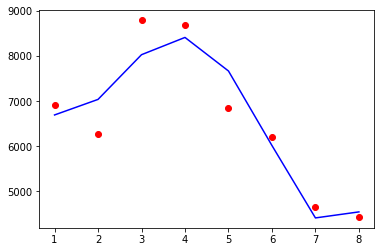

In [87]:
lin_reg=LinearRegression()
lin_reg.fit(x,y0)

poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(x)
poly_reg.fit(X_poly,y0)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y0)

X_grid=np.arange(min(x),max(x),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(x,y0,color='red')
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color='blue')

In [90]:
float(lin_reg2.intercept_)

8468.07142857143

In [91]:
lin_reg2.coef_

array([[-415.4047619]])

In [65]:
for column in dots_for_regression_df.columns:
  print(column, dots_for_regression_df[column].iloc[0]/(sum(dots_for_regression_df[column].iloc[0:])))

TypeError: ignored

In [74]:
dots_for_regression_df.iloc[0].sum()

52790

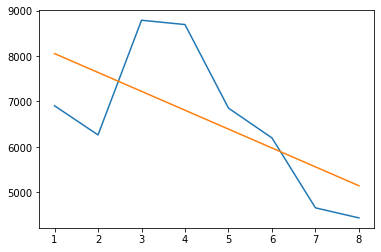

In [76]:
first = list(dots_for_regression_df.iloc[0])
second = [-415.404761904762*i + 8468.07142857143 for i in range(1, 9)]

plt.plot(x, first, x, second)

In [79]:
dots_for_regression_df.iloc[:, 1]

0     6263
1      319
3       70
5     2914
13      19
18      52
19      39
20       2
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
Name: sem_2, dtype: int64

In [ ]:
df_1.groupby([df_1.iloc[:, 1], 'hash']).count()

labels_sem_1  labels_sem_2
labels_sem_2 hash                            
0            1                1             1
             7                1             1
             8                1             1
             9                1             1
             10               1             1
             20               1             1
             22               1             1
             50               1             1
             60               1             1
             433              1             1
             5643             1             1
1            3                1             1
             10               1             1
             13               1             1
             44               1             1
             56               1             1
             72               1             1
             121              1             1
3            2                1             1
             68               1             1
5            1                1             1
             3                1             1
             1197             1             1
             1713             1             1
13           19               1             1
18           52               1             1
19           39               1             1
20           2                1             1

In [ ]:
count = 0
for index in df_1.groupby([df_1.iloc[:, 1], 'hash']).count().index.unique():
     count += index[1]

In [ ]:
# (НЕ РАБОЧИЙ) Проверка на перетекание кластеров и перезапись некоторых меток (НЕ РАБОЧИЙ)

changed_cluster_match_list = []
possible_labels_dict = {}


for df in cluster_match_list:
  new_label = max(df.iloc[:, 0]) + 1
  changed_cluster_match_df = df.copy(deep=True)
  labels_1 = list(set(df.iloc[:, 0]))

  for label_1 in labels_1:
    transition_list = []
    labels_2 = df.loc[df.iloc[:, 0] == label_1, df.columns[1]].values.flatten()
    values = df.loc[df.iloc[:, 0] == label_1, ['hash']].values.flatten()
    i_max = np.argmax(values)
    
    for index, label_2 in enumerate(labels_2):
      if values[index]/np.sum(values) > 0.5:
        transition_list.append((label_1, values[index]))
      else:
        transition_list.append((new_label, values[index]))
        print(values[index])
      new_label += 1
      possible_labels_dict.update({label_2:transition_list})
    

"""
    if values[i_max]/np.sum(values) > 0.5:
      changed_cluster_match_df.loc[(changed_cluster_match_df.iloc[:, 0] == label) 
                      & (changed_cluster_match_df.iloc[:, 1] == labels_2[i_max]), 
                                    changed_cluster_match_df.columns[1]] = label
    else:
      changed_cluster_match_df.loc[(changed_cluster_match_df.iloc[:, 0] == label) 
                      & (changed_cluster_match_df.iloc[:, 1] == labels_2[i_max]), 
                                    changed_cluster_match_df.columns[1]] = new_label
"""
    
    
  #changed_cluster_match_list.append(changed_cluster_match_df)



#changed_cluster_match_list[0]
#possible_labels_dict

In [ ]:
# Работающий
df = cluster_match_list[0]

possible_labels_dict = {}
for i in list(set(df.iloc[:, 1])):
  possible_labels_dict.update({i: []})


labels_1 = list(set(df.iloc[:, 0]))
new_label = max(df.iloc[:, 0]) + 1

for label_1 in labels_1:
  labels_2 = df.loc[df.iloc[:, 0] == label_1, df.columns[1]].values.flatten()
  values = df.loc[df.iloc[:, 0] == label_1, ['hash']].values.flatten()
  for index, label_2 in enumerate(labels_2):
    transition_list = []
    if values[index]/np.sum(values) > 0.5:
      transition_list.append((label_1, values[index], 'more than 0.5'))
    else:
      transition_list.append((new_label, values[index]))
      new_label += 1

    possible_labels_dict[label_2].append(transition_list)






In [ ]:
possible_labels_dict

{0: [[(0, 5643, 'more than 0.5')],
  [(19, 9)],
  [(20, 8)],
  [(21, 433)],
  [(22, 1)],
  [(24, 7)],
  [(8, 60, 'more than 0.5')],
  [(26, 22)],
  [(10, 50, 'more than 0.5')],
  [(11, 20, 'more than 0.5')],
  [(12, 10, 'more than 0.5')]],
 1: [[(15, 52)]],
 2: [[(16, 10)],
  [(1, 121, 'more than 0.5')],
  [(2, 56, 'more than 0.5')],
  [(4, 3, 'more than 0.5')],
  [(6, 13, 'more than 0.5')],
  [(7, 44, 'more than 0.5')],
  [(9, 72, 'more than 0.5')]],
 3: [[(25, 39)]],
 4: [[(17, 1197)],
  [(5, 1713, 'more than 0.5')],
  [(27, 3)],
  [(14, 1, 'more than 0.5')]],
 5: [[(18, 2)], [(3, 68, 'more than 0.5')]],
 6: [[(23, 2)]],
 7: [[(13, 19, 'more than 0.5')]]}

In [ ]:
# Значения перезаписывают друг друга
for key in possible_labels_dict.keys():
  fast_choise_list = []
  for entry in possible_labels_dict[key]:
    if len(entry[0]) > 2:
      fast_choise_list.append([entry[0][0], entry[0][1]])
  max_value = 0
  for i in fast_choise_list:
    if i[1] > max_value:
      cluster_num, max_value = i[0], i[1]
  print(cluster_num, key)
  df.loc[(df.iloc[:, 1] == int(key)), df.columns[1]] = cluster_num


In [ ]:
# Для тестов
fast_choise_list = []
for entry in possible_labels_dict[4]:
  if len(entry[0]) > 2:
    fast_choise_list.append([entry[0][0], entry[0][1]])
max_value = 0
for i in fast_choise_list:
  if i[1] > max_value:
    cluster_num, max_value = i[0], i[1]
print(cluster_num)
df.loc[(df.iloc[:, 1] == int(key)), df.columns[1]] = cluster_num


In [ ]:
cluster_match_list[0]

,labels_sem_1,labels_sem_2,hash
0,0,0,5643
1,0,0,52
2,0,1,10
3,0,3,1197
4,0,3,2
5,1,0,9
6,1,1,121
7,2,1,56
8,3,0,8
9,3,3,68


In [ ]:
possible_labels_dict

{0: [[(0, 5643, 'more than 0.5')],
  [(19, 9)],
  [(20, 8)],
  [(21, 433)],
  [(22, 1)],
  [(24, 7)],
  [(8, 60, 'more than 0.5')],
  [(26, 22)],
  [(10, 50, 'more than 0.5')],
  [(11, 20, 'more than 0.5')],
  [(12, 10, 'more than 0.5')]],
 1: [[(15, 52)]],
 2: [[(16, 10)],
  [(1, 121, 'more than 0.5')],
  [(2, 56, 'more than 0.5')],
  [(4, 3, 'more than 0.5')],
  [(6, 13, 'more than 0.5')],
  [(7, 44, 'more than 0.5')],
  [(9, 72, 'more than 0.5')]],
 3: [[(25, 39)]],
 4: [[(17, 1197)],
  [(5, 1713, 'more than 0.5')],
  [(27, 3)],
  [(14, 1, 'more than 0.5')]],
 5: [[(18, 2)], [(3, 68, 'more than 0.5')]],
 6: [[(23, 2)]],
 7: [[(13, 19, 'more than 0.5')]]}

In [ ]:
'''При первом прохождении записывать в словарь кандидатов на изменение
{метка позднего семестра: [(метка первого семестра, количество), (метка первого семестра, количество)]}
Метки могут быть либо тех кластеров, более половины которых перешло в следующий, либо новые
При втором прохождении выбирать из кандидатов сначала по проценту оригинальных кластеров, потом по количеству элементов'''



possible_labels_dict = {}
new_label = max(df.iloc[:, 0]) + 1

df = cluster_match_list[0]
labels_2 = list(set(df.iloc[:, 1]))

for label_2 in labels_2:
  labels_1 = df.loc[df.iloc[:, 1] == label_2, df.columns[0]].values.flatten()
  values = df.loc[df.iloc[:, 1] == label_2, ['hash']].values.flatten()
  for index, label_1 in enumerate(labels_1):
    print(label_2, label_1)

In [ ]:
# Оставить эту ячейку под реализацию в цикле и сделать вручную одну таблицу для презентации в другой




unique_elements = list(set(df.iloc[:, 0]))








i=0
for value in cluster_match_dict.values():
  for index in value.index:
    if value.iloc[:, 0][index] in hash_df_list[i].groupby(['labels']).count().iloc[:, 0] and value.iloc[:, 2][index] > 0.5*hash_df_list[i].groupby(['labels']).count().iloc[:, 1][index]:
      print(value.iloc[:, 2][index])
  i+=1

In [ ]:
# Проверка суммы хешей по пересечениям кластеров и присваивание нового номера

In [ ]:
# Выделение массива меток кластеров

np.array(compare_list[0]['labels_sem_1'])

array([1, 0, 0, ..., 4, 0, 0], dtype=int32)

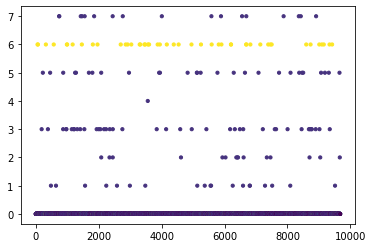

In [ ]:
# Возможно убрать эту ячейку?

plt.scatter(compare_list[0].index, compare_list[0]['labels_sem_2'], c=compare_list[0]['labels_sem_1'], s=10)